Calculating the susceptible, infected and recovered(SIR) population

In [4]:
import numpy as np
import pandas as pd

OD = pd.read_csv('./data/od_matrix.csv')
OD = OD.apply (pd.to_numeric, errors='coerce')
OD = OD.fillna(0)
OD.to_csv('od_matrix_cleaned')

OD = OD.drop(columns=['ward_no'])

OD = OD.to_numpy()

population_data = pd.read_csv('./data/ward_population.csv')
population = population_data['population']

N_k = np.abs(population + OD.sum(axis=0) - OD.sum(axis=1))
locs_len = len(N_k)
#print(locs_len)
SIR = np.zeros(shape=(locs_len, 3))
#print(SIR)
SIR[:,0] = N_k

infection_data = pd.read_csv('./data/infected_ward_population.csv')
first_infections = infection_data['infections']

SIR[:, 0] = SIR[:, 0] - first_infections
SIR[:, 1] = SIR[:, 1] + first_infections  

print(SIR)



[[9.5368e+04 0.0000e+00 0.0000e+00]
 [8.0180e+04 0.0000e+00 0.0000e+00]
 [8.0037e+04 0.0000e+00 0.0000e+00]
 [7.2794e+04 0.0000e+00 0.0000e+00]
 [7.2154e+04 0.0000e+00 0.0000e+00]
 [7.1854e+04 1.0000e+00 0.0000e+00]
 [7.1004e+04 0.0000e+00 0.0000e+00]
 [6.8922e+04 0.0000e+00 0.0000e+00]
 [6.8554e+04 0.0000e+00 0.0000e+00]
 [6.8132e+04 0.0000e+00 0.0000e+00]
 [6.6314e+04 0.0000e+00 0.0000e+00]
 [6.5890e+04 0.0000e+00 0.0000e+00]
 [6.5113e+04 0.0000e+00 0.0000e+00]
 [6.3083e+04 0.0000e+00 0.0000e+00]
 [6.3033e+04 0.0000e+00 0.0000e+00]
 [6.2272e+04 0.0000e+00 0.0000e+00]
 [6.2057e+04 0.0000e+00 0.0000e+00]
 [6.1474e+04 5.0000e+00 0.0000e+00]
 [6.1070e+04 1.0000e+00 0.0000e+00]
 [6.0483e+04 0.0000e+00 0.0000e+00]
 [5.9289e+04 0.0000e+00 0.0000e+00]
 [5.8967e+04 0.0000e+00 0.0000e+00]
 [5.8815e+04 0.0000e+00 0.0000e+00]
 [5.8355e+04 0.0000e+00 0.0000e+00]
 [5.8199e+04 0.0000e+00 0.0000e+00]
 [5.8129e+04 0.0000e+00 0.0000e+00]
 [5.7814e+04 0.0000e+00 0.0000e+00]
 [5.7335e+04 0.0000e+00 0.00

Calculating the normalised SIR

In [5]:
import numpy as np
import pandas as pd

row_sums = SIR.sum(axis=1)

SIR_n = SIR / row_sums[:, np.newaxis]
print(SIR_n)
  

[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99986083e-01 1.39169160e-05 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.99918671e-01 8.13285837e-05 0.00000000e+00]
 [9.99983626e-01 1.63743839e-05 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.000000

Providiing the values for the variables

In [6]:
beta = 1.6
gamma = 0.04
public_trans = 0.5                                 # alpha
R0 = beta/gamma
beta_vec = np.random.gamma(1.6, 2, locs_len)
gamma_vec = np.full(locs_len, gamma)
public_trans_vec = np.full(locs_len, public_trans)

print(beta_vec.shape)

(198,)


Using the SIR model to get the values for the graphs and curves and storing into a csv

In [8]:
 # make copy of the SIR matrices 
SIR_sim = SIR.copy()
SIR_nsim = SIR_n.copy()
  
# run model
#print(SIR_sim.sum(axis=0).sum() == N_k.sum())
  
from tqdm import tqdm_notebook
  
infected_pop_norm = []
susceptible_pop_norm = []
recovered_pop_norm = []

all_wards_data = {}
n = 1

for time_step in tqdm_notebook(range(100)):
    infected_mat = np.array([SIR_nsim[:,1],]*locs_len).transpose()
      
    OD_infected = (OD*infected_mat)
      
    inflow_infected = OD_infected.sum(axis=0)
      
    inflow_infected = (inflow_infected*public_trans_vec)
      
    #print('total infected inflow: ', inflow_infected.sum())
      
    new_infect = beta_vec*SIR_sim[:, 0]*inflow_infected/(N_k + OD.sum(axis=0))
    new_recovered = gamma_vec*SIR_sim[:, 1]
      
    new_infect = np.where(new_infect>SIR_sim[:, 0], SIR_sim[:, 0], new_infect)
      
    SIR_sim[:, 0] = SIR_sim[:, 0] - new_infect
    SIR_sim[:, 1] = SIR_sim[:, 1] + new_infect - new_recovered
    SIR_sim[:, 2] = SIR_sim[:, 2] + new_recovered
    
    SIR_sim = np.where(SIR_sim<0,0,SIR_sim)
      
    # recompute the normalized SIR matrix
    row_sums = SIR_sim.sum(axis=1)
    SIR_nsim = SIR_sim / row_sums[:, np.newaxis]
      
    S_j = SIR_sim[:,0]/N_k
    I_j = SIR_sim[:,1]/N_k
    R_j = SIR_sim[:,2]/N_k
    
    ward_wise = []
    ward_wise.append(S_j)
    ward_wise.append(I_j)
    ward_wise.append(R_j)

    all_wards_data[n] = ward_wise
    n = n + 1
    
    S = SIR_sim[:,0].sum()/N_k.sum()
    I = SIR_sim[:,1].sum()/N_k.sum()
    R = SIR_sim[:,2].sum()/N_k.sum()
    
    infected_pop_norm.append(I)
    susceptible_pop_norm.append(S)
    recovered_pop_norm.append(R)
    
recs = []
recs.append(susceptible_pop_norm)
recs.append(infected_pop_norm)
recs.append(recovered_pop_norm)
                                                                                                                    
df = pd.DataFrame(recs)
print(df)
    
df.to_csv('sir_curve.csv')    
    


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



             0             1         2         3         4         5   \
0  9.999910e-01  9.999886e-01  0.999985  0.999981  0.999974  0.999965   
1  8.704577e-06  1.077961e-05  0.000014  0.000018  0.000024  0.000032   
2  2.889737e-07  6.371568e-07  0.000001  0.000002  0.000002  0.000003   

         6         7         8         9   ...        90        91        92  \
0  0.999952  0.999934  0.999909  0.999873  ...  0.300296  0.299002  0.297761   
1  0.000043  0.000059  0.000082  0.000115  ...  0.124133  0.120462  0.116885   
2  0.000005  0.000006  0.000009  0.000012  ...  0.575570  0.580536  0.585354   

         93        94        95        96        97        98        99  
0  0.296569  0.295426  0.294328  0.293274  0.292262  0.291289  0.290355  
1  0.113401  0.110008  0.106706  0.103492  0.100364  0.097322  0.094364  
2  0.590030  0.594566  0.598966  0.603234  0.607374  0.611388  0.615281  

[3 rows x 100 columns]


Plotting the graphs from the above data

<Figure size 864x288 with 0 Axes>

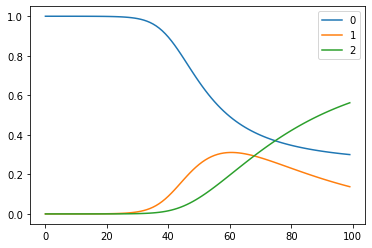

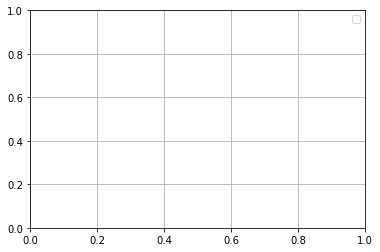

In [17]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

df = df.transpose()

fig = plt.figure(figsize=(12,4))
df.plot()
plt.show()

plt.grid("True")

plt.legend(["Susceptible","Infected","Removed"])

Creating the predictions for all the 198 wards in Bangalore 

In [4]:
    import numpy as np
    import pandas as pd
    
    all_wards = {}
    cols = []
    
    Day = [1, 2, 3, 4, 5, 6, 7]
    S = [1, .80, .50, .34, .23, .13, .4]
    I = [.0, .10, .50, .84, .5, .3, .14]
    R = [.0, .05, .40, .74, .75, .75, .75]
    
    numpy_array = np. array([Day, S, I, R])
    transpose = numpy_array.T
    transpose_list = transpose. tolist()
    print(transpose_list)

    #cols.append(Day)
    #cols.append(S)
    #cols.append(I)
    #cols.append(R)

    sir = pd.DataFrame(transpose_list, columns=['Day', 'S', 'I', 'R']) 
    print(sir)
    
    #for i in range(0, 198):
    #    all_wards[i + 1] = sir
    
    all_wards[1] = sir
        
    print(all_wards)

[[1.0, 1.0, 0.0, 0.0], [2.0, 0.8, 0.1, 0.05], [3.0, 0.5, 0.5, 0.4], [4.0, 0.34, 0.84, 0.74], [5.0, 0.23, 0.5, 0.75], [6.0, 0.13, 0.3, 0.75], [7.0, 0.4, 0.14, 0.75]]
   Day     S     I     R
0  1.0  1.00  0.00  0.00
1  2.0  0.80  0.10  0.05
2  3.0  0.50  0.50  0.40
3  4.0  0.34  0.84  0.74
4  5.0  0.23  0.50  0.75
5  6.0  0.13  0.30  0.75
6  7.0  0.40  0.14  0.75
{1:    Day     S     I     R
0  1.0  1.00  0.00  0.00
1  2.0  0.80  0.10  0.05
2  3.0  0.50  0.50  0.40
3  4.0  0.34  0.84  0.74
4  5.0  0.23  0.50  0.75
5  6.0  0.13  0.30  0.75
6  7.0  0.40  0.14  0.75}
